# **Breve exploración de metapoblaciones en paisajes fragmentados**

## *¿Cómo sobreviven las especies en paisajes fragmentados por actividades agrícolas?*

## Agradecimientos
![Image](./Diapositiva2.png)

In [25]:
# Módulos necesarios
import numpy
from ipywidgets import interactive
from scipy.integrate import odeint
from matplotlib import pyplot
from IPython.display import display

In [26]:
numpy.set_printoptions(precision=3)
%matplotlib inline
pyplot.style.use('seaborn-deep')
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 18
pyplot.rcParams['axes.labelsize'] = 24
pyplot.rcParams['figure.figsize'] = (13, 8)

## 1. Metapoblaciones
![Image](./Diapositiva4.png)

### Metapoblación

Hace casi 50 años, Richard Levins imaginó cómo una especie podría sobrevivir en un paisaje fragmentado. En su modelo, el paisaje está compuesto por parches de hábitat y áreas inhabitables, y cada parche de hábitat está ocupado por una población local que, debido a variaciones ambientales, corre un riesgo de extinción. Las poblaciones locales son independientes, pero los individuos pueden migrar colonizando nuevos parches de hábitat. Este conjunto de poblaciones locales que interactúan a través de la migración de individuos se llama *metapoblación*: una población de poblaciones. El balance entre extinción y colonización determina la supervivencia de las especies en el paisaje.

### Metapoblación

![Image](./Diapositiva5.png)


### Modelo clásico
![Image](./Diapositiva6.png)

### Supervivencia

Aunque sólo una fracción $h$ de parches son habitables, los individuos se pueden mover en todo el paisaje y en un tiempo $t$, una proporción $p(t)$ de parches están ocupados. Como los parches de hábitat son similares, tienen la misma probabilidad de ser colonizados, $c$, y las poblaciones locales tienen la misma probabilidad de extinción $e$; tanto la probabilidad de colonización como de extinción varían entre especies. La tasa a la que aparecen nuevas poblaciones, es decir, la tasa a la que se ocupan los parches, depende de la probabilidad de colonización $c$, de la proporción de parches habitados $p$ (de donde provienen los individuos) y de la proporción de parches no habitados $h-p$ (hacia donde van los individuos): $$ Colonización = c p (h-p). $$

Por otro lado, la tasa a la que desaparecen las poblaciones, es decir, la tasa a la que se desocupan los parches, depende de la probabilidad de extinción local $e$ y de la proporción de parches habitados $p$: $$ Extinción = e p. $$

Entonces la proporción de parches habitados cambia en el tiempo de acuerdo a $$\frac{dp}{dt} = cp(h-p) -ep.$$

### Supervivencia de la metapoblación

La metapoblación alcanza el equilibrio $p^*$ cuando las tasas de colonización y extinción son iguales, es decir, cuando $$ cp(h-p)=ep, $$ de donde, $$p^*=h-\frac{e}{c}.$$

Este valor $p^*$ es la proporción de parches ocupados que conforman la metapoblación en el largo plazo. 

Cuando todo el paisaje es habitable ($h = 1$), la metapoblación sobrevive ($p^* > 0$) si la probabilidad de colonización es mayor a la probabilidad de extinción, es decir, si $c>e$. Al disminuir la proporción de parches habitables, también disminuye la tasa de colonización. La razón entre las probabilidades de colonización y extinción contrarrestra la pérdida de hábitat en tanto $h>\frac{e}{c}$; la metapoblación se extingue si la pérdida de hábitat cruza ese umbral, incluso si aún hay parches habitables. 

##### Exploración

In [27]:
def levins(parches_ocupados, t, colonización, hábitat, extinción): 
    """
    Modelo de metapoblaciones de Levins (1969)
    Cambio en el tiempo de los parches_ocupados, entre todos los parches
    """
    d_parches_ocupados = colonización * parches_ocupados * (hábitat-parches_ocupados) \
                        - extinción * parches_ocupados
    return d_parches_ocupados

In [28]:
def graficar_levins(colonización=0.8, extinción=0.2, hábitat=1):
    tiempo = numpy.linspace(0, 40, 41)
    población_inicial=1.0
    
    parches_ocupados = odeint(levins, población_inicial, tiempo, 
           args=(colonización, hábitat, extinción))
    
    pyplot.figure()
    pyplot.plot(tiempo, parches_ocupados[:], 
                label = "e/c= {:.3f}".format(extinción/colonización), lw=4)
    pyplot.ylim(-0.05, 1.1)
    pyplot.xlabel('tiempo')
    pyplot.ylabel('parches ocupados')
    pyplot.title('Metapoblación con $e/c= {:.2f}$\n'.format(extinción/colonización))
    #pyplot.legend()
    
x = interactive(graficar_levins, 
                colonización = (0, 1, 0.1),
                extinción = (0, 1, 0.1),
                hábitat = (0, 1, 0.1))

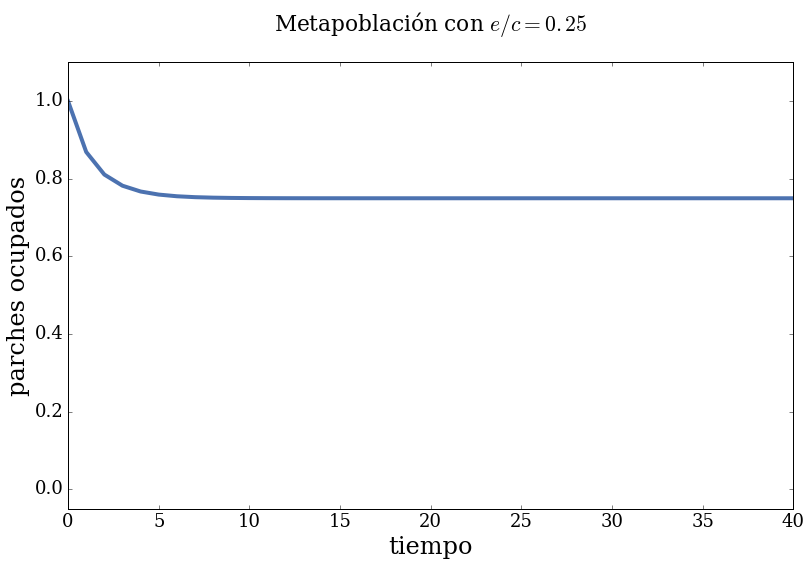

In [29]:
display(x)

### Vulnerabilidad ante la pérdida de hábitat

Ante la pérdida de hábitat, la metapoblación es sensible a variaciones ambientales. 

Para observar esta vulnerabilidad graficaremos las tasas de colonización y extinción en función de la proporción de parches ocupados. La tasa de colonización tiene la forma de una parábola y la de extinción, de una recta:

$$ Colonización = c p (h-p) = cph - cp^2,$$
$$ Extinción = e p. $$

El punto de equlibirio $p^*$ ocurre en la intersección de las curvas. De nuevo, observemos que existe un punto de equilibrio si $h>\frac{e}{c}$ y que la pérdida de hábitat disminuye la tasa de colonización.

Ahora imaginemos una especie afectada por alguna variación ambiental la cual incrementa su probabilidad de extinción, por ejemplo, una epidemia. La especie sobreviviría si este cambio ocurre cuando una gran proporción del paisaje es habitable, pero se extinguiría a nivel regional si ha ocurrido una pérdida significativa de hábitat.

##### Exploración

In [30]:
def graficar_tasas_levins(colonización=0.8, extinción=0.2, hábitat=1):
    parches = numpy.linspace(0, 1, 50)
    equilibrio = hábitat - extinción/colonización
    tasa_colonización = colonización * parches * (hábitat - parches)
    tasa_extinción = extinción * parches
    
    pyplot.figure()
    
    pyplot.plot(parches, tasa_colonización, lw=5, label='colonización')
    pyplot.plot(parches, tasa_extinción, '--', lw=5, label='extinción')
    pyplot.plot(equilibrio, equilibrio * extinción, "o", ms=10, c='r')
    pyplot.plot(equilibrio, 0.005, "^", ms=15, c='r')

    
    pyplot.ylim(0, 0.3)
    pyplot.xlim(0, 1.01)
    
    pyplot.xlabel('parches ocupados')
    pyplot.ylabel('tasas')
    pyplot.title('Equilibrio entre tasas con $p^*={:.2f}$'.format(equilibrio))
    pyplot.legend(loc='upper right', fontsize = "small")

    
y = interactive(graficar_tasas_levins, 
                colonización = (0, 1, 0.1),
                hábitat = (0, 1, 0.1),
                extinción = (0, 1, 0.1))

### Vulnerabilidad

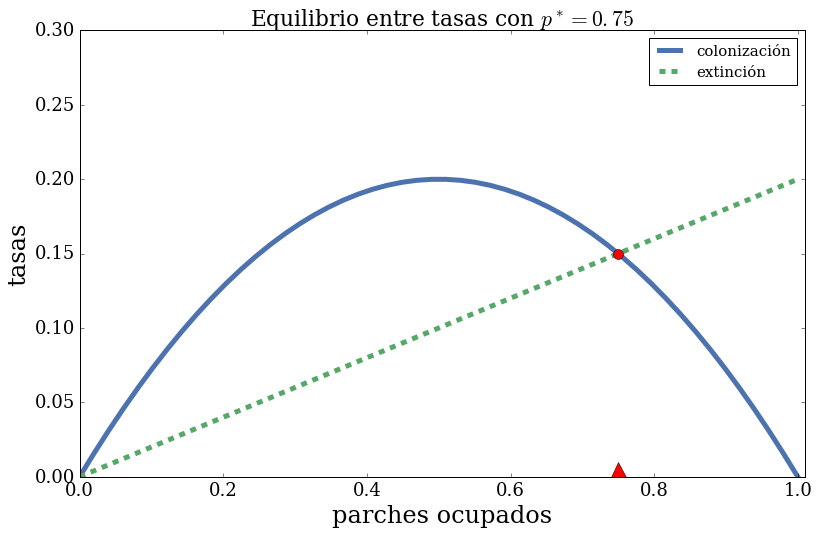

In [31]:
display(y)

## 2. Calidad del paisaje
![Image](./Diapositiva9.png)

Ahora veremos cómo en un paisaje donde se realizan actividades agrícolas, la calidad de las áreas donde están distribuidos los parches de hábitat también influye en la dinámica de metapoblaciones. 

### Un parche - (Vandermeer & Carvajal 2001)

![Image](./Diapositiva10.png)


La población dentro de un parche de hábitat, $x_t$, tiene una tasa de crecimiento $r$ y se comporta de acuerdo al modelo logístico, $$x_{t+1}=rx_{t}(1-x_t).$$

En cada tiempo una fracción de la población $e$ emigra del parche hacia el exterior. La proporción de individuos que emigra depende de la calidad del paisaje alrededor del parche: entre mayor es la calidad del paisaje, mayor es la proporción de individuos que emigra. Al incorporar la emigración en la dinámica de población local obtenemos $$x_{t+1} = r x_{t}(1- x_{t})- e x_{t}.$$

Debido a la emigración, también hay una cantidad de individuos $y_t$ fuera del parche y en cada tiempo una fracción $i$ regresa al interior, pero el resto muere. La proporción de individuos que inmigra depende de qué tan aislado está el parche. Al incorporar la inmigración a la dinámica local de población, junto con la dinámica de la población fuera del parche, obtenemos las siguientes ecuaciones: 

$$\begin{aligned}
x_{t+1} &= r(x_{t}+iy_{t})(1- x_{t}- i y_{t})- e x_{t} \\
y_{t+1} &= e x_{t}.
\end{aligned}$$

### Supervivencia de la metapoblación

Ahora la supervivencia de la metapoblación depende tanto de la dinámica de población local como de la calidad del paisaje. 

En un paisaje de muy baja calidad ($e=0$), no ocurre emigración y la población en el parche está aislada. Incrementar la calidad del paisaje induce una dinámica de metapoblación, a 

La población podría tener una tasa de crecimiento que le permitiera sobrevivir de forma aislada, incluso siguiendo un comportamiento caótico (por ejemplo con $r=3.8$). En este caso, al aumentar la calidad del paisaje la población pasa a formar parte de una metapoblación y el parche experimenta extinciones periódicas, es decir, su supervivencia ahora depende de los individuos fuera del parche. Si la población sobrevivía de forma aislada, ahora es vulnerable a variaciones ambientales que pudieran afectar la dinámica de metapoblación.

Por otro lado, cuando la tasa de crecimiento de la población en el parche es demasiado grande ($r>4$), la población se extingue si está aislada ($e=0$), pero sobrebrevive como una metapoblación cuando el paisaje a su alrededor permite la emigración, aunque sólo hasta cierto punto: si la calidad del paisaje es muy alta, el parche se vuelve vulnerable a variaciones ambientales como en el caso anterior.

##### Exploración

In [32]:
def vandermeer(x, y, r, i, e):
    """
    Modelo de metapoblaciones de Vandermeer & Carvajal (2001).
    
    Parámetros
    x: densidad de población en parche
    y: densidad de población fuera de parche
    r: tasa de crecimiento
    i: proporción de individuos que inmigra al parche
       (medida del aislamiento del parche)
    e: proporción de individuos que emigra del parche 
       (medida de la calidad del paisaje de alrededor)
    """
    x_next = r * (x + i*y)*(1 - x - i*y) - e*x
    if x_next <= 0.001:
        x_next = 0
    
    y_next = e * x
    if y_next <= 0.001:
        y_next = 0
        
    return x_next, y_next

In [33]:
def graficar_vandermeer(e, r=4.01):    
    tiempo = 40
    x_0 = 0.1 # densidad de población en parche
    y_0 = 0 # densidad de población fuera de parche
    i = 0.4 # inmigración hacia el parche
    
    x = [0]*(tiempo + 1)
    y = [0]*(tiempo + 1)
    x[0] = x_0
    y[0] = y_0
    for t in range(tiempo):
        x[t+1], y[t+1] = vandermeer(x[t], y[t], r, i, e)
        
    pyplot.figure()
    pyplot.plot(numpy.linspace(0, tiempo, tiempo+1), x, lw=3)
    pyplot.plot(numpy.linspace(0, tiempo, tiempo+1), numpy.zeros(tiempo+1), '--', c='red', lw=4)
    pyplot.ylim(-0.01, 1.1)
    pyplot.xlabel('tiempo')
    pyplot.ylabel('población')
    pyplot.title('Población en parche de hábitat')

In [34]:
w = interactive(graficar_vandermeer, r={'3.8': 3.8, '4.01':4.01}, e=(0, 1, 0.1))

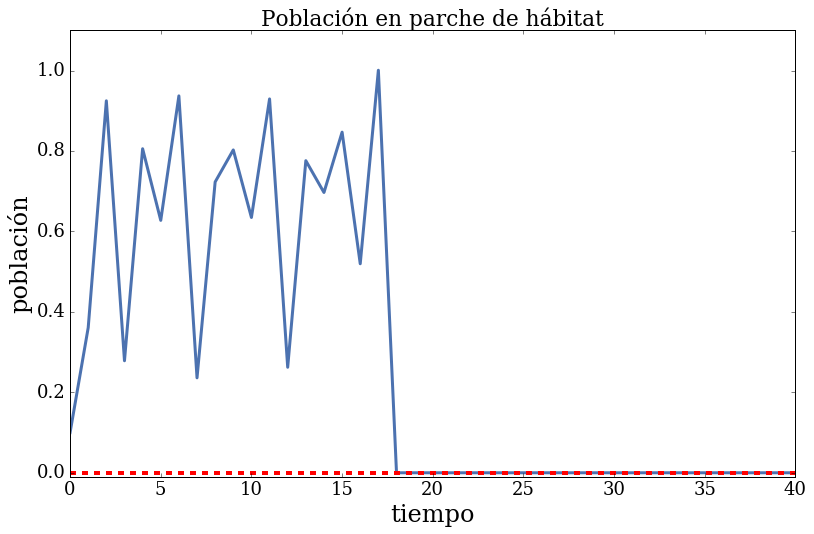

In [35]:
display(w)

## 3. Estrategias de conservación
![Image](./Diapositiva13.png)

### Metacomunidad - (González *et al.* 2016)
![Image](./Diapositiva14.png)

### Distribución espacial
![Image](./Diapositiva15.png)

### Comparación
![Image](./Diapositiva16.png)

## Perspectivas
![Image](./Diapositiva18.png)

## Referencias

1. González González, C., López Martínez, R., Hernández López, S., & Benítez, M. (2016). A dynamical model to study the effect of landscape agricultural management on the conservation of native ecological networks. *Agroecology and Sustainable Food Systems, 40*(9), 922–940. http://doi.org/10.1080/21683565.2016.1209271
2. Levins, R. (1969). Some demographic and genetic consequences of environmental heterogeneity for biological control. *Bulletin of the Entomological Society of America, 15*(3), 237–240. http://doi.org/10.1093/besa/15.3.237
3. Vandermeer, J., & Carvajal, R. (2001). Metapopulation dynamics and the quality of the matrix. *The American Naturalist, 158*(3), 211–220. http://doi.org/10.1086/321318

# Estilo
from IPython.core.display import HTML
css_file = "./estilo.css"
HTML(open(css_file, "r").read())